# OpenCV fundamentals

This notebook covers opening files, looking at pixels, and some simple image processing techniques.

We'll use the following sample image, stolen from the Internet. But you can use whatever image you like.

![No idea](noidea.jpg "I have no idea")

If you can't see an image above then you haven't got the full tutorial code from github. In the same directory as this notebook you should also have the following files:

```
common.py  
common.pyc  
edgedemo.png  
noidea.jpg  
video.py  
video.pyc
```

If you haven't got them, make sure you've got the whole repo from [https://github.com/handee/opencv-gettingstarted]

## Python getting started

First we need to import the relevant libraries: OpenCV itself, Numpy, and a couple of others. Common and Video are simple data handling and opening routines that you can find in the OpenCV Python Samples directory or from the github repo linked above. 

In [2]:
%matplotlib inline
import cv2
import common
import video
import numpy as np
import cv2
from matplotlib import pyplot as plt

Now we can open an image:

In [3]:
input_image=cv2.imread('noidea.jpg')

We can find out various things about that image

In [4]:
print input_image.size

776250


In [5]:
print input_image.shape

(414, 625, 3)


In [6]:
print input_image.dtype

uint8


**gotcha** that last one (datatype) is one of the tricky things about working in Python. As it's not strongly typed, Python will allow you to have arrays of different types but the same size, and some functions will return arrays of types that you probably don't want. Being able to check and inspect the datatype like this is very useful and is one of the things I often find myself doing in debugging.

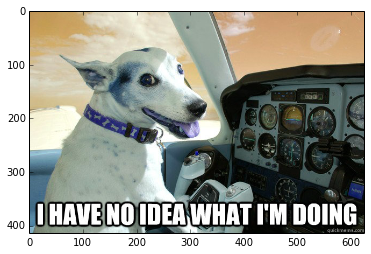

In [19]:
plt.imshow(input_image)

What this illustrates is something key about OpenCV: it doesn't store images in RGB format, but in BGR format.

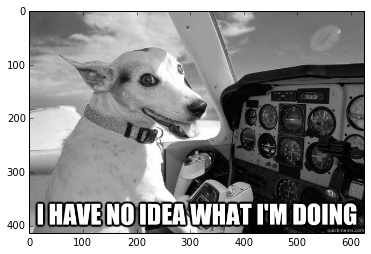

In [22]:
# split channels
b,g,r=cv2.split(input_image)
# show one of the channels (this is red - see that the sky is kind of dark. try changing it to b)
plt.imshow(r, cmap='gray')


## stuff about window handling

It's worth noting here that we're using matplotlib to show the images, as we're using a Jupyter notebook. This means we need to think about things like "colormaps".

When you use opencv outside of the notebook context, there are other things to remember - you'll need to create a window to put the image into with 

```
cv2.namedWindow("windowname")
```

You'll probably be displaying images from a video, or in a loop, and so you'll need to redraw the window with
```
cv2.waitkey(t)
```

This is a **gotcha** for the opencv interface: t is the delay in milliseconds, and what the command does is it waits for user input; however it also does the window redraw. 

## Getting image data and setting image data

Images in python OpenCV are numpy arrays. Numpy arrays are optimised for fast array operations and so there are usually fast methods for doing array calculations which don't actually involve writing all the detail yourself. So it's usually bad practice to access individual pixels, but you can.

In [27]:
pixel = input_image[100,100]
print pixel

[150 161 153]


In [29]:
input_image[100,100]=[0,0,0]
pixelnew = input_image[100,100]
print pixelnew

[0 0 0]


## Getting and setting regions of an image

In the same way as we can get or set individual pixels, we can get or set regions of an image. This is a particularly useful way to get a region of interest to work on. 

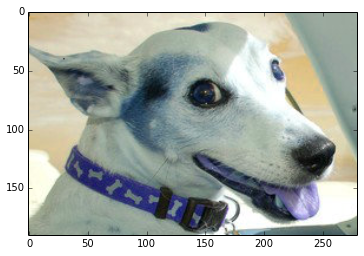

In [36]:
dogface = input_image[60:250, 70:350]
plt.imshow(dogface)

In [25]:
# stuff about summary statistics
min_value, max_value, min_location, max_location=cv2.minMaxLoc(b)
print "min {} is at {}, and max {} is at {}".format(min_value, min_location, max_value, max_location)

min 0.0 is at (175, 117), and max 255.0 is at (577, 37)
